# Packages and OS

In [9]:
%load_ext autoreload
%autoreload 2

# generic packages
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm.auto import tqdm
from datetime import datetime
import pandas as pd
import seaborn as sns
import copy


# # os directory
YOUR_FOLDER_DIRECTORY = os.getcwd()

# Assuming 'src' directory is located one level above the notebook directory
project_directory = os.path.join(YOUR_FOLDER_DIRECTORY, '..')
sys.path.append(project_directory)

# src code
from src.portfolio_class import Portfolio

from src.config import (

    TICKERS,
    START_DATE,
    END_DATE,
    INTERVAL,
    RISK_FREE_RATE,
    MSCI_SCORE_ALREADY_DOWNLOADED,
    FREQUENCY_RETURNS
)
from src.backtesting_score import (

    get_last_esg_scores,
    get_first_date_with_all_msci_score_available,
    retrieve_last_esg_date
)

from src.controverse_score import (

    get_new_esg_score_min_method,
    get_new_esg_score_proba_method,
    boostrap_method_effect,
    compute_mean_over_controverse,
    compute_new_esg_score_with_method,
    change_msci_score_with_controverse,
    proba_controverse_effective
)
# scraper code
from exploration.scrapper.scraper import (
    download_msci_esg_ratings_htmlfile,
    load_dict_from_json
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Download MSCI data

In [2]:
if MSCI_SCORE_ALREADY_DOWNLOADED:
    # load data
    msci_score = load_dict_from_json("../data/exemple_msci_esg_ratings_numeric.json")
else:
    # scrap data
    msci_score={}
    for ticker in tqdm(TICKERS):
        dict = download_msci_esg_ratings_htmlfile(tickers=[ticker])
        msci_score[ticker] = dict[ticker]

    for ticker in msci_score.keys():
        for key, rating in msci_score[ticker]['esg_score_dict'].items():
            key = datetime.strptime(key, '%b-%y').strftime('%Y-%m-%d')
    # # save data
    # from src.config import save_dict_to_json
    # save_dict_to_json(msci_score, "../data/exemple_msci_esg_ratings_numeric.json")
    # MSCI_SCORE_ALREADY_DOWNLOADED=True


# Method min

In [3]:
ESG_SCORE=30
CONTROVERSE_SCORE= 2.5

In [4]:
get_new_esg_score_min_method(esg_score=ESG_SCORE, controverse_score=CONTROVERSE_SCORE)

30.0

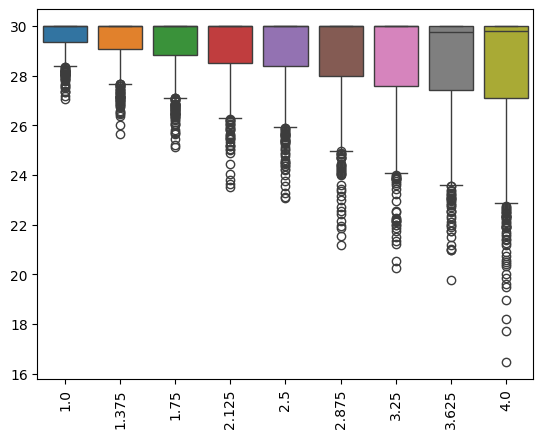

In [5]:
boostrap_method_effect(esg_score=ESG_SCORE, method_function = get_new_esg_score_min_method, nb_boostrap=1000)

In [6]:
from scipy.stats import norm

alpha = 0.05

# calcul de la valeur critique avec alpha
norm.ppf(q=alpha, loc=ESG_SCORE, scale=CONTROVERSE_SCORE)

25.887865932621317

# Method probabilistic

In [7]:
get_new_esg_score_proba_method(esg_score=30, controverse_score=2.5)

30

In [12]:
def new_proba(c, proba_pour_1, proba_pour_4):
    a_plus_b = np.log(proba_pour_1)
    quatre_a_plus_b = np.log(proba_pour_4)
    a = (quatre_a_plus_b - a_plus_b) / 3
    b = a_plus_b - a
    return np.exp(a * c + b)


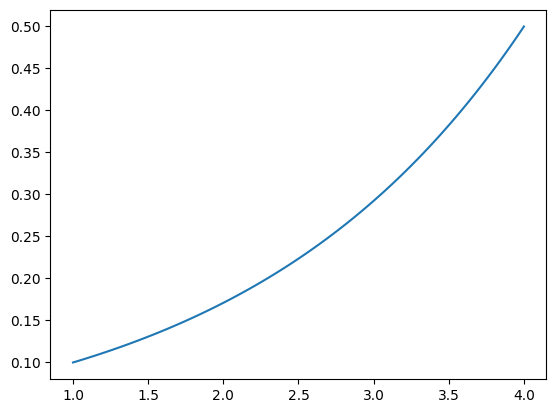

In [18]:
x=np.linspace(1, 4, 100)
plt.plot(x, new_proba(x, 0.1, 0.5))

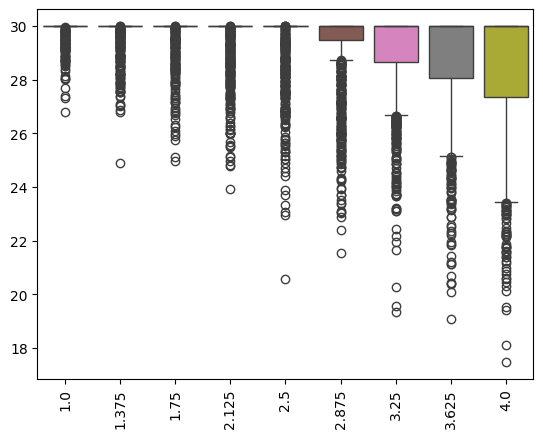

In [41]:
boostrap_method_effect(esg_score=30, method_function = get_new_esg_score_proba_method, nb_boostrap=1000)